In [1]:
import sys
from pathlib import Path
root_path = Path().resolve().parents[1]
sys.path.append(str(root_path))
from utils.data_loader import DataLoader
import pandas as pd       
import numpy as np        
from sklearn.model_selection import train_test_split  
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("../../data/external/diabetes/diabetes.csv")

<Axes: xlabel='age', ylabel='Count'>

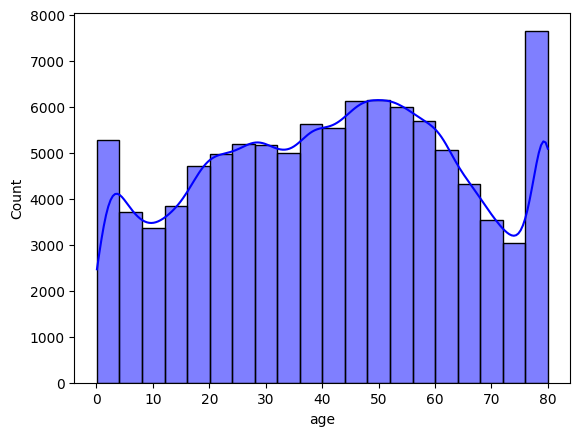

In [31]:
sns.histplot(df['age'], kde=True, color='blue', bins=20)

In [32]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [20]:
#Verificar se há valores nulos
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [21]:
#Verifica os tipos
print(df.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [3]:
#Faz os dummies
df = pd.get_dummies(df, columns= ['gender', 'smoking_history'] , drop_first=True)

In [4]:
X = df.drop("diabetes", axis = 1)
y = df.diabetes

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Separação entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=5)

In [6]:
DataLoader.export_data("diabetes", X_train, X_test, X_scaled, y, y_train, y_test)